# 06 - Interactive Stock Analysis Dashboard

This notebook provides an interactive dashboard for comprehensive stock analysis.

**Features:**
- Interactive stock selector
- Real-time price charts with technical indicators
- Technical analysis panel
- Fundamental metrics display
- Portfolio tracker
- ML prediction integration

---

## Setup

In [1]:
# Import libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from src.data.fetcher import get_stock_data
from src.visualization.dashboard import StockDashboard, PortfolioDashboard
from src.indicators import TrendIndicators, MomentumIndicators, VolatilityIndicators
from src.fundamental import FinancialRatios, GrowthMetrics

print("✅ Libraries imported successfully!")
print("\n📊 Dashboard ready to use!")

✅ Libraries imported successfully!

📊 Dashboard ready to use!


## 1. Stock Analysis Dashboard

Interactive dashboard for analyzing individual stocks.

### Features:
- Dropdown to select different stocks
- Toggle technical indicators (SMA 20, 50, 200)
- Show/hide volume
- Technical indicator summary
- Fundamental metrics

**Instructions:**
1. Select a stock from the dropdown
2. Choose which indicators to display
3. Toggle volume on/off
4. View technical and fundamental analysis panels

In [2]:
# Define watchlist
watchlist = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'TSLA', 'JPM', 'V', 'JNJ']

# Create and show dashboard
print("Loading dashboard...\n")
dashboard = StockDashboard(watchlist, start_date='2022-01-01')
dashboard.show()

Loading dashboard...



## 2. Portfolio Dashboard

Track your portfolio performance over time.

**Define your portfolio** by specifying ticker symbols and number of shares.

Loading portfolio dashboard...

Loaded AAPL from cache
Cached MSFT data
Successfully fetched MSFT (1001 records)
Cached GOOGL data
Successfully fetched GOOGL (1001 records)
Cached NVDA data
Successfully fetched NVDA (1001 records)
Cached TSLA data
Successfully fetched TSLA (1001 records)


HTML(value='\n        <div style="background-color: #e7f3ff; padding: 20px; border-radius: 10px; border: 2px s…

Loaded AAPL from cache
Loaded MSFT from cache
Loaded GOOGL from cache
Loaded NVDA from cache
Loaded TSLA from cache


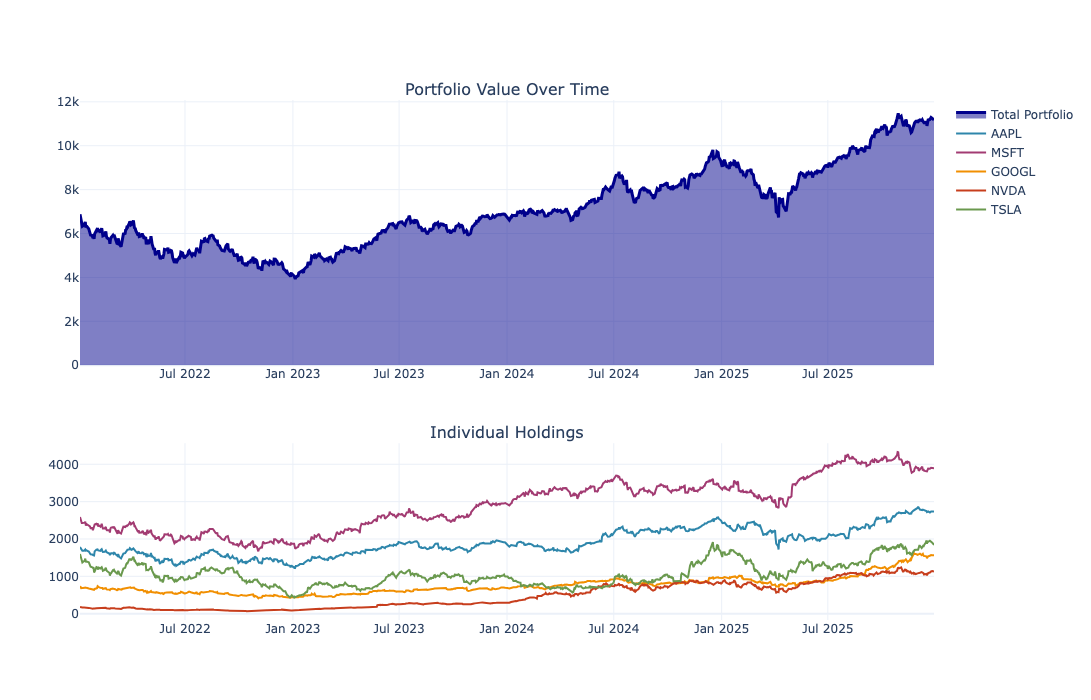

In [3]:
# Define your portfolio (ticker: number of shares)
my_portfolio = {
    'AAPL': 10,
    'MSFT': 8,
    'GOOGL': 5,
    'NVDA': 6,
    'TSLA': 4
}

# Create portfolio dashboard
print("Loading portfolio dashboard...\n")
portfolio_dash = PortfolioDashboard(my_portfolio, start_date='2022-01-01')
portfolio_dash.show()

## 3. Custom Analysis Panel

Create your own custom analysis combining different metrics.

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Stock selector
ticker_input = widgets.Text(
    value='AAPL',
    description='Ticker:',
    placeholder='Enter ticker symbol'
)

# Analysis button
analyze_button = widgets.Button(
    description='Analyze',
    button_style='success',
    icon='chart-line'
)

# Output area
output = widgets.Output()

def analyze_stock(button):
    """Perform comprehensive analysis."""
    with output:
        clear_output(wait=True)
        
        ticker = ticker_input.value.upper()
        
        try:
            print(f"🔍 Analyzing {ticker}...\n")
            
            # Fetch data
            df = get_stock_data(ticker, start='2022-01-01')
            
            # Calculate indicators
            current_price = df['Close'].iloc[-1]
            sma_50 = TrendIndicators.calculate_sma(df, 50).iloc[-1]
            sma_200 = TrendIndicators.calculate_sma(df, 200).iloc[-1]
            rsi = MomentumIndicators.calculate_rsi(df, 14).iloc[-1]
            
            # Calculate returns
            returns_1m = ((df['Close'].iloc[-1] / df['Close'].iloc[-21]) - 1) * 100
            returns_3m = ((df['Close'].iloc[-1] / df['Close'].iloc[-63]) - 1) * 100
            returns_1y = ((df['Close'].iloc[-1] / df['Close'].iloc[-252]) - 1) * 100
            
            # Display analysis
            print("="*60)
            print(f"📈 {ticker} STOCK ANALYSIS")
            print("="*60)
            print(f"\n💰 Price Information:")
            print(f"   Current Price: ${current_price:.2f}")
            print(f"   SMA 50: ${sma_50:.2f}")
            print(f"   SMA 200: ${sma_200:.2f}")
            
            print(f"\n📊 Technical Indicators:")
            print(f"   RSI (14): {rsi:.2f}")
            
            if rsi > 70:
                print("   ⚠️  Status: OVERBOUGHT")
            elif rsi < 30:
                print("   ⚠️  Status: OVERSOLD")
            else:
                print("   ✅ Status: NEUTRAL")
            
            print(f"\n📈 Performance:")
            print(f"   1 Month: {returns_1m:+.2f}%")
            print(f"   3 Months: {returns_3m:+.2f}%")
            print(f"   1 Year: {returns_1y:+.2f}%")
            
            print(f"\n🎯 Trend Analysis:")
            if current_price > sma_50 > sma_200:
                print("   ✅ Strong Uptrend (Price > SMA50 > SMA200)")
            elif current_price > sma_50:
                print("   ✅ Moderate Uptrend (Price > SMA50)")
            elif current_price < sma_50 < sma_200:
                print("   ❌ Strong Downtrend (Price < SMA50 < SMA200)")
            else:
                print("   ❌ Moderate Downtrend (Price < SMA50)")
            
            print("\n" + "="*60)
            
        except Exception as e:
            print(f"❌ Error analyzing {ticker}: {str(e)}")

# Attach event handler
analyze_button.on_click(analyze_stock)

# Display interface
display(widgets.VBox([
    widgets.HTML("<h3>🔬 Custom Stock Analyzer</h3>"),
    ticker_input,
    analyze_button,
    output
]))

## 4. Multi-Stock Comparison

Compare multiple stocks side-by-side.

Comparing: AAPL, MSFT, GOOGL, AMZN

Loaded AAPL from cache
Loaded MSFT from cache
Loaded GOOGL from cache
Cached AMZN data
Successfully fetched AMZN (1001 records)


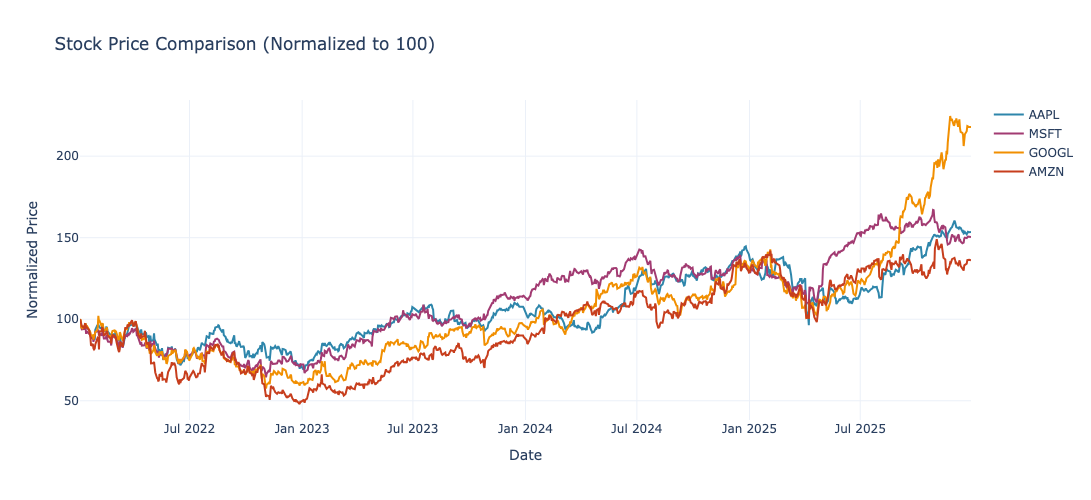


📊 Total Returns:
   GOOGL: +117.89%
   AAPL: +53.56%
   MSFT: +50.39%
   AMZN: +36.19%


In [5]:
import plotly.graph_objects as go

# Stocks to compare
comparison_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

print(f"Comparing: {', '.join(comparison_tickers)}\n")

# Fetch data and normalize
comparison_data = {}
for ticker in comparison_tickers:
    df = get_stock_data(ticker, start='2022-01-01')
    # Normalize to 100
    normalized = (df['Close'] / df['Close'].iloc[0]) * 100
    comparison_data[ticker] = normalized

# Create comparison chart
fig = go.Figure()

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
for i, (ticker, data) in enumerate(comparison_data.items()):
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data.values,
        name=ticker,
        line=dict(color=colors[i], width=2)
    ))

fig.update_layout(
    title='Stock Price Comparison (Normalized to 100)',
    xaxis_title='Date',
    yaxis_title='Normalized Price',
    template='plotly_white',
    height=500,
    hovermode='x unified'
)

fig.show()

# Performance summary
performance_summary = {}
for ticker, data in comparison_data.items():
    total_return = ((data.iloc[-1] / 100) - 1) * 100
    performance_summary[ticker] = total_return

print("\n📊 Total Returns:")
for ticker, ret in sorted(performance_summary.items(), key=lambda x: x[1], reverse=True):
    print(f"   {ticker}: {ret:+.2f}%")

## 5. Sector Rotation Analysis

Track performance across different sectors.

Analyzing sector performance...

Cached XLK data
Successfully fetched XLK (750 records)
Cached XLV data
Successfully fetched XLV (750 records)
Cached XLF data
Successfully fetched XLF (750 records)
Cached XLE data
Successfully fetched XLE (750 records)
Cached XLY data
Successfully fetched XLY (750 records)
Cached XLP data
Successfully fetched XLP (750 records)
Cached XLI data
Successfully fetched XLI (750 records)
Cached XLU data
Successfully fetched XLU (750 records)
📊 Sector Performance (YTD):
1. 🟢 Technology                +141.87%
2. 🟢 Consumer Discretionary    +93.12%
3. 🟢 Finance                   +69.15%
4. 🟢 Industrials               +66.90%
5. 🟢 Utilities                 +33.34%
6. 🟢 Healthcare                +20.89%
7. 🟢 Energy                    +17.04%
8. 🟢 Consumer Staples          +14.27%


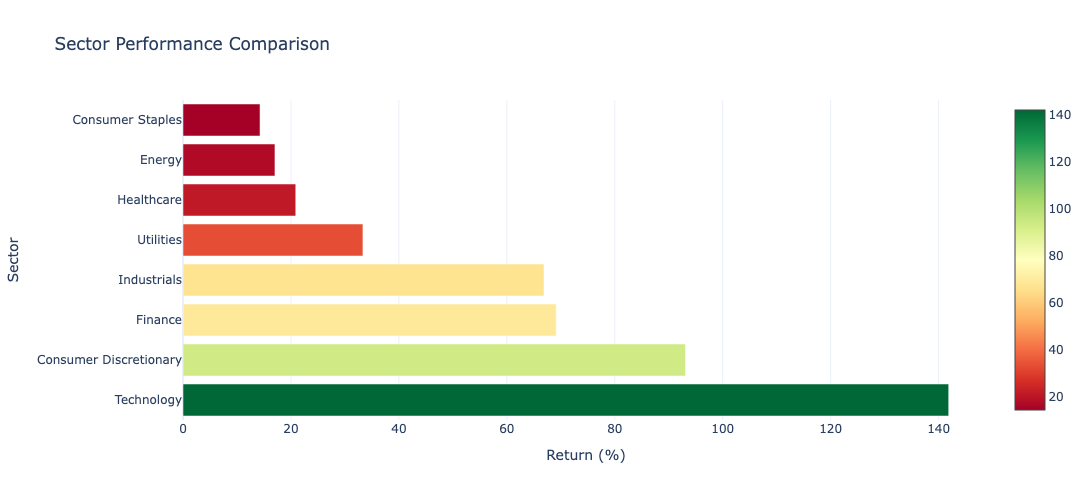

In [6]:
# Sector ETFs
sectors = {
    'Technology': 'XLK',
    'Healthcare': 'XLV',
    'Finance': 'XLF',
    'Energy': 'XLE',
    'Consumer Discretionary': 'XLY',
    'Consumer Staples': 'XLP',
    'Industrials': 'XLI',
    'Utilities': 'XLU'
}

print("Analyzing sector performance...\n")

# Calculate sector returns
sector_returns = {}
for sector_name, etf in sectors.items():
    try:
        df = get_stock_data(etf, start='2023-01-01')
        total_return = ((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100
        sector_returns[sector_name] = total_return
    except:
        sector_returns[sector_name] = 0

# Sort by performance
sorted_sectors = sorted(sector_returns.items(), key=lambda x: x[1], reverse=True)

# Display
print("📊 Sector Performance (YTD):")
print("="*50)
for i, (sector, ret) in enumerate(sorted_sectors, 1):
    emoji = "🟢" if ret > 0 else "🔴"
    print(f"{i}. {emoji} {sector:25s} {ret:+.2f}%")

# Visualize
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=[s[1] for s in sorted_sectors],
    y=[s[0] for s in sorted_sectors],
    orientation='h',
    marker=dict(
        color=[s[1] for s in sorted_sectors],
        colorscale='RdYlGn',
        showscale=True
    )
))

fig.update_layout(
    title='Sector Performance Comparison',
    xaxis_title='Return (%)',
    yaxis_title='Sector',
    template='plotly_white',
    height=500
)

fig.show()

## Summary

This dashboard provides:

✅ **Interactive Stock Analysis** - Select stocks and view technical/fundamental metrics  
✅ **Portfolio Tracking** - Monitor your portfolio performance  
✅ **Custom Analysis** - Create personalized analysis tools  
✅ **Multi-Stock Comparison** - Compare multiple stocks  
✅ **Sector Analysis** - Track sector rotation  

---

### Next Steps:

- Customize the dashboard for your needs
- Add more stocks to your watchlist
- Track your real portfolio
- Integrate ML predictions (see notebook 04)
- Add backtesting results (see notebook 05)

**Experiment and explore!** 🚀